<a href="https://colab.research.google.com/github/IlhamKhalis/MachineLearning_2023/blob/main/Job%20Sheet%204%3A%20Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ilham Khalis Putra Agatha 2141720230 3G/ 12

Link : https://github.com/IlhamKhalis/MachineLearning_2023

Praktikum 1

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

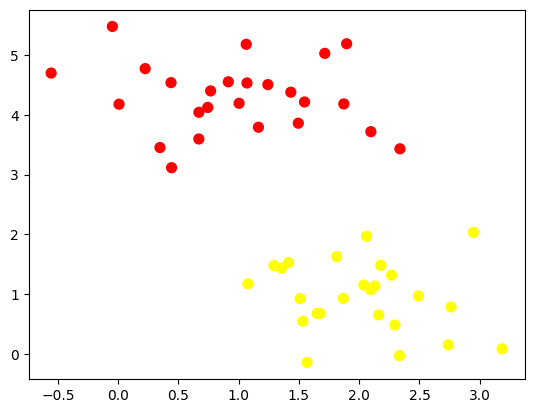

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

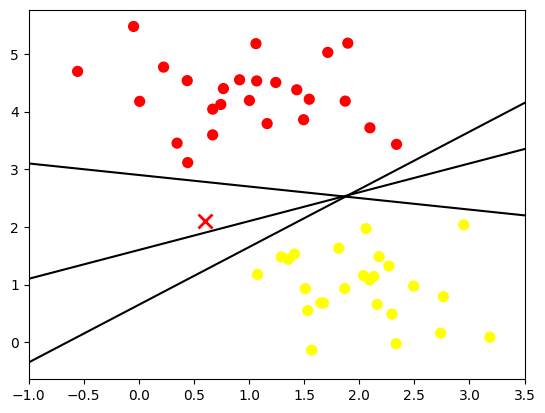

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

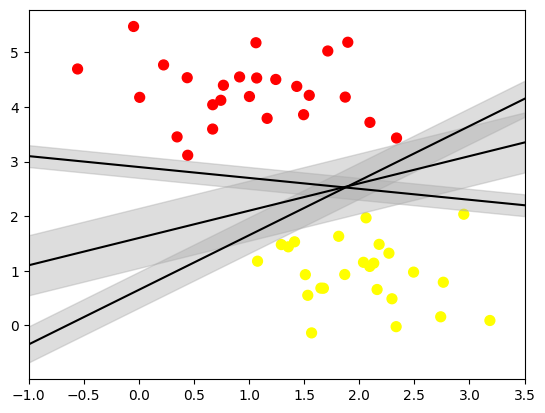

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

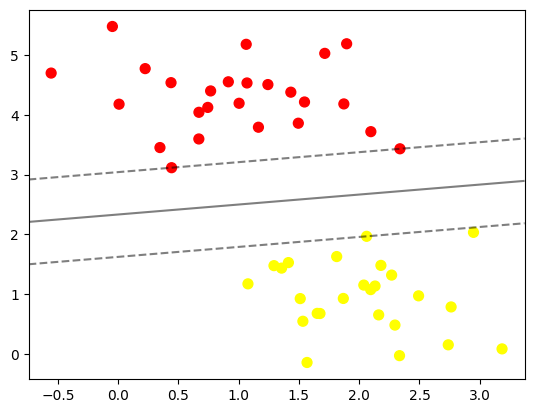

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

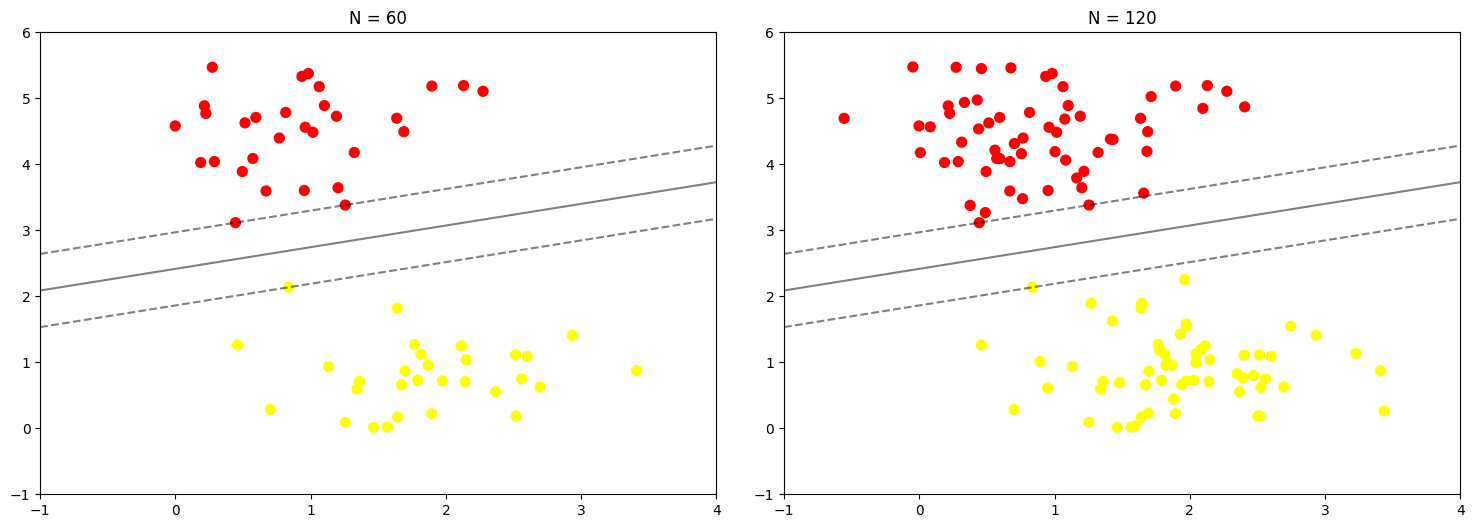

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

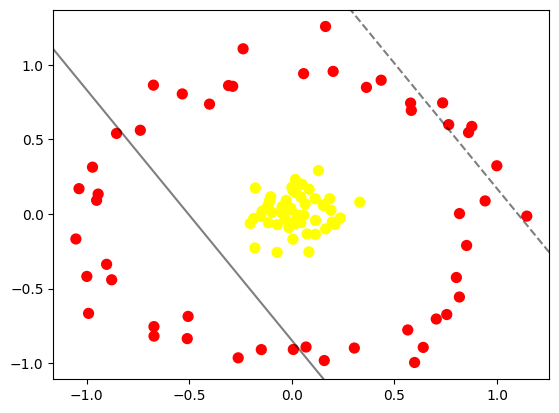

In [10]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [11]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.96969412e-01, -5.38021445e-02],
       [-1.13974340e-01, -5.85692188e-02],
       [ 4.35464851e-01,  8.96882243e-01],
       [-5.09700567e-01, -8.35080335e-01],
       [-3.08317401e-01,  8.60773777e-01],
       [-9.99077972e-01, -4.18239458e-01],
       [ 1.14532334e+00, -1.40939232e-02],
       [-6.74482193e-01,  8.63643145e-01],
       [-2.61335508e-01, -9.63957357e-01],
       [-1.45377939e-01,  1.75491493e-02],
       [-9.71139235e-02,  1.15011769e-02],
       [ 3.25663051e-02, -9.10431665e-03],
       [ 1.69876725e-02, -6.41706546e-02],
       [ 1.13906237e-01,  1.02628411e-01],
       [-9.43924610e-01,  1.33680256e-01],
       [ 3.64920777e-04,  1.78687221e-01],
       [ 5.35136945e-03, -1.68598203e-01],
       [ 1.64380310e-01,  1.25686129e+00],
       [ 8.52032451e-01, -2.10808144e-01],
       [-9.02740042e-01, -3.37165187e-01],
       [-1.39292612e-02, -9.11660520e-02],
       [ 3.63724281e-01,  8.48759861e-01],
       

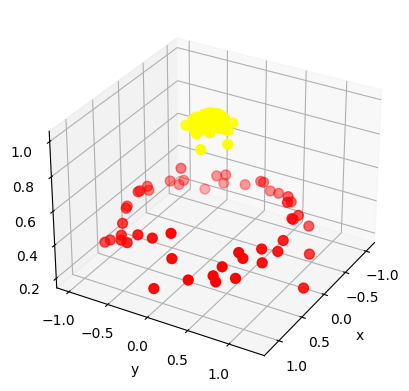

In [22]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [23]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

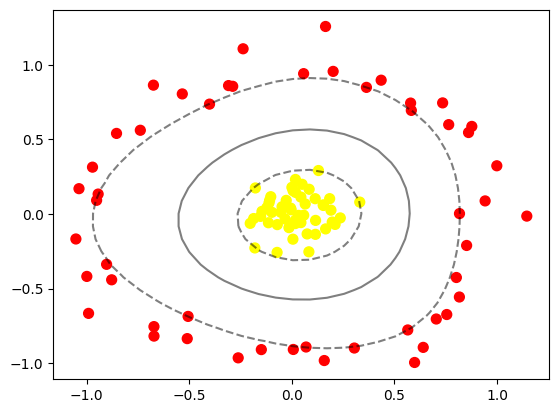

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

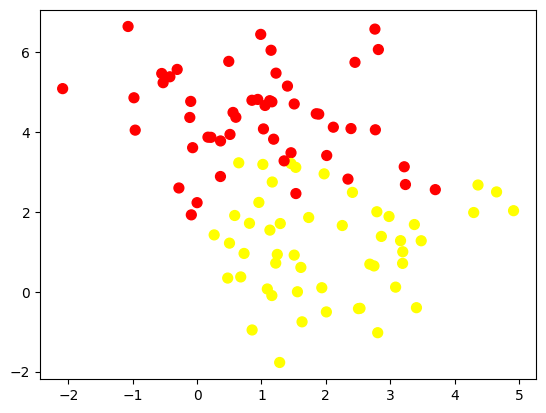

In [25]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

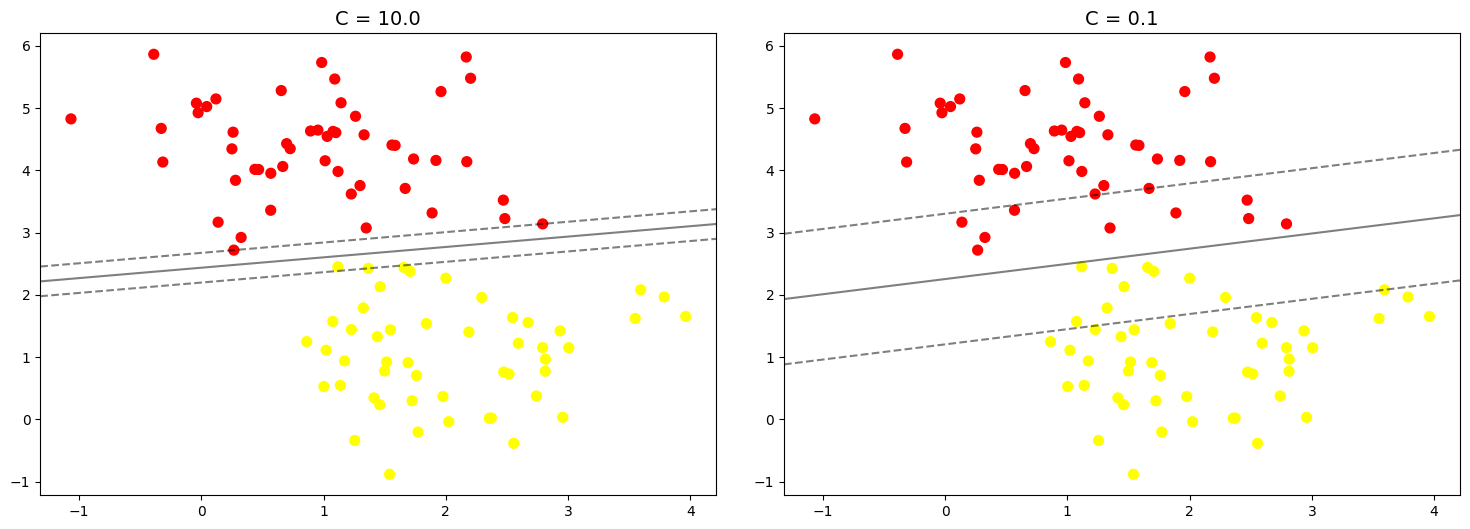

In [26]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Praktikum 2

In [27]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


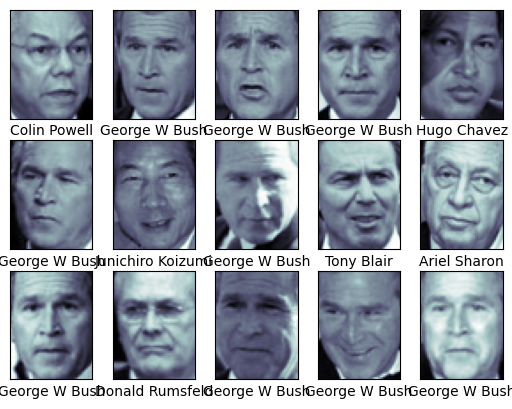

In [28]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [29]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [30]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 58.9 s, sys: 43.3 s, total: 1min 42s
Wall time: 1min 3s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [32]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

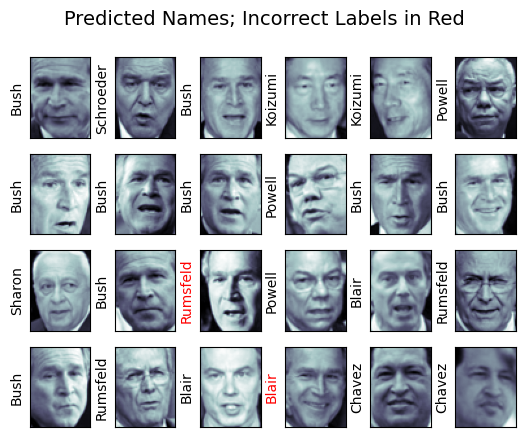

In [33]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

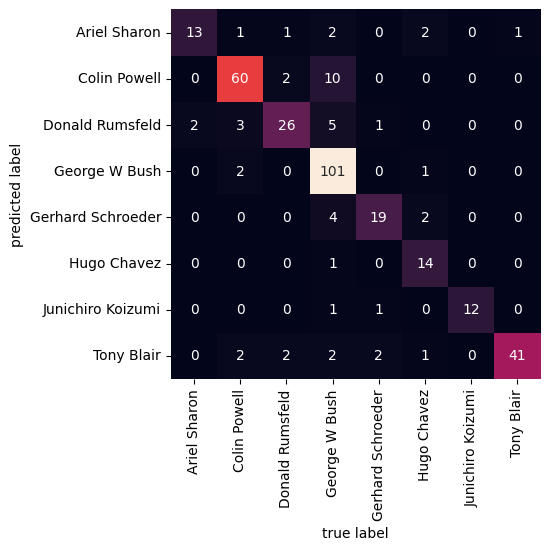

In [35]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Praktikum 3

In [36]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 50 172]
 [131 378]
 [ 90  82]
 [163 120]
 [122  41]
 [147  74]
 [ 99  49]
 [ 55  36]
 [202  26]
 [ 54 176]
 [129 120]
 [  3 154]
 [ 28 219]
 [143  45]
 [ 59  94]
 [ 60 241]
 [ 71 114]
 [125  76]
 [127  87]
 [ 21 130]
 [ 74 106]
 [131 121]
 [146 174]
 [130  79]
 [ 30 159]
 [286  41]
 [200 110]
 [ 12 102]
 [  4 106]
 [ 12  93]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [37]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,50,172,0
1,131,378,0
2,90,82,0
3,163,120,0
4,122,41,0


In [38]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,50,172,Kelas B
1,131,378,Kelas B
2,90,82,Kelas B
3,163,120,Kelas B
4,122,41,Kelas B


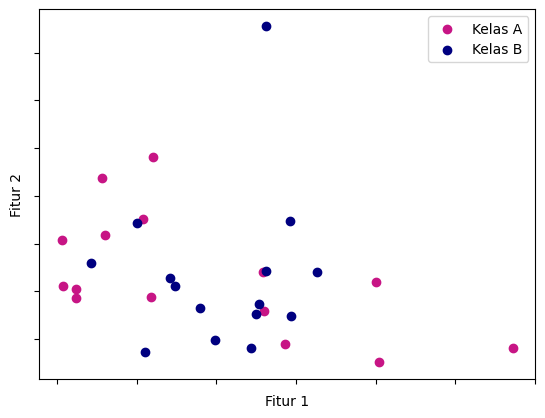

In [39]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [40]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.7619047619047619
Hasil akurasi data test: 0.4444444444444444


In [41]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.8095238095238095
Hasil akurasi data test (Gaussian): 0.3333333333333333


Praktikum 4

In [42]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving spam.csv to spam.csv


In [43]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [47]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
X = df['SMS'].values
y = df['Labels'].values

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


Tugas

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv

In [61]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving voice.csv to voice.csv


Akurasi: 0.9763406940063092
              precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Confusion Matrix:
 [[293   4]
 [ 11 326]]


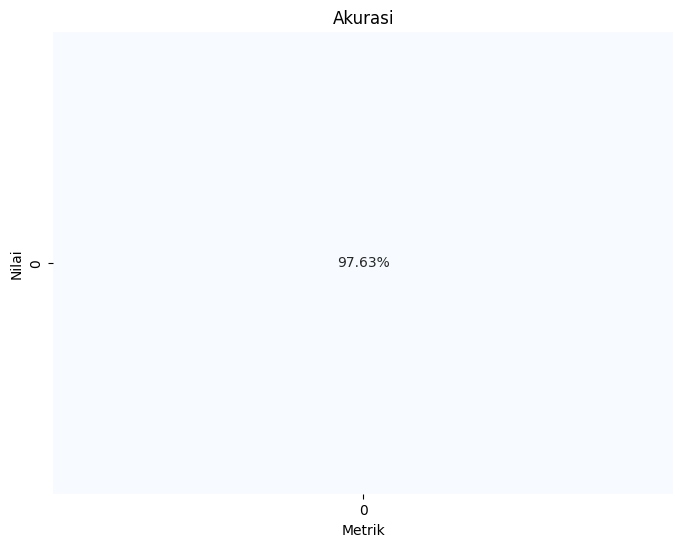

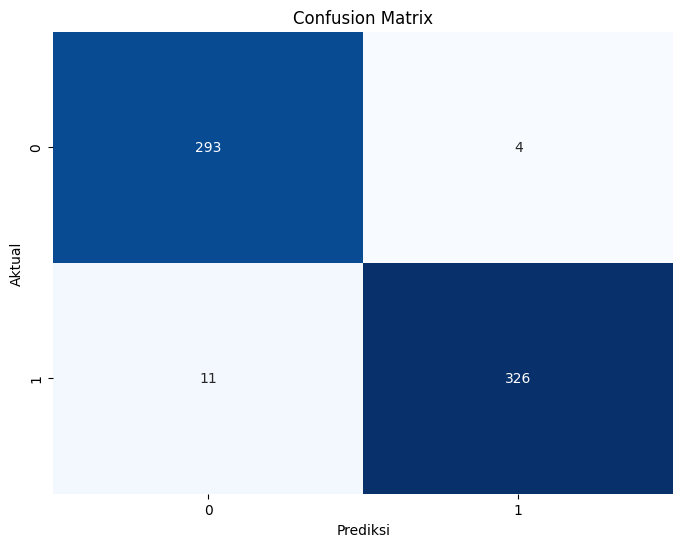

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Impor data
data = pd.read_csv('voice.csv')

# Pisahkan fitur dan label
X = data.drop('label', axis=1)  # Fitur
y = data['label']              # Label

# Bagi Data menjadi Data Latih dan Data Uji:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalakan Fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi Model SVM
svm_classifier = SVC(kernel='linear', C=1)

# Latih Model SVM
svm_classifier.fit(X_train, y_train)

# Evaluasi Model
y_pred = svm_classifier.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Report Klasifikasi
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Akurasi
plt.figure(figsize=(8, 6))
sns.heatmap([[accuracy]], annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Akurasi')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur CountVectorizer dengan mengaktifkan stop_words
  3. Evaluasi hasilnya

Akurasi: 0.9838565022421525
Laporan Klasifikasi:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[959   6]
 [ 12 138]]


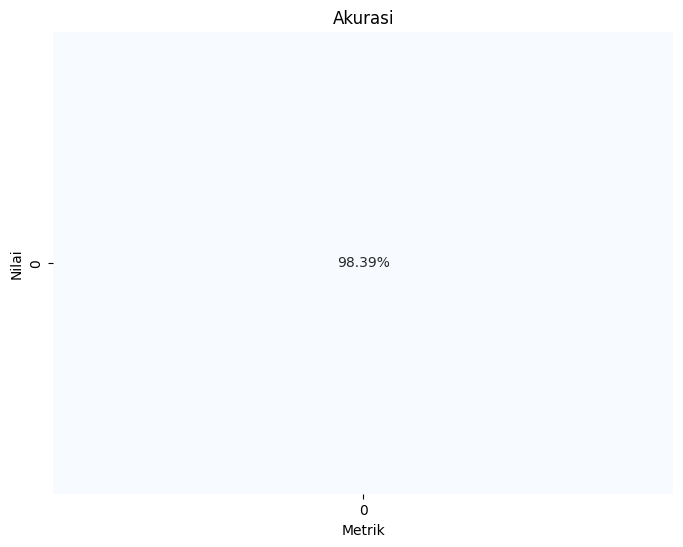

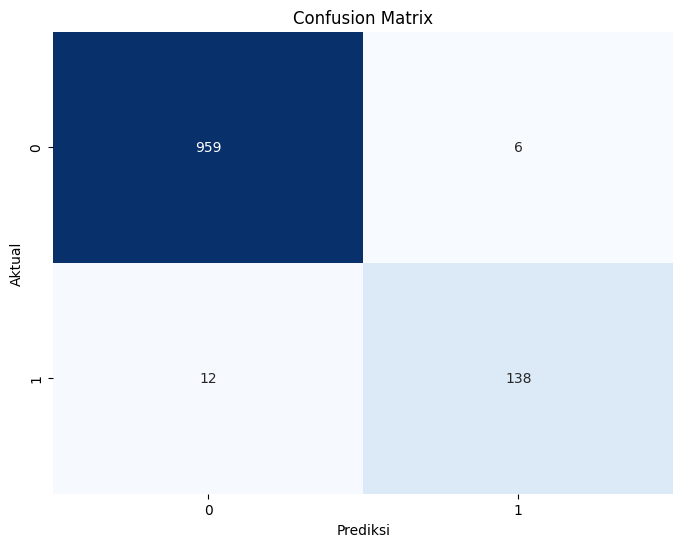

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Muat data spam.csv
data = pd.read_csv('spam.csv', encoding='latin-1')

# Bagi data menjadi data latih dan data uji
X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan konfigurasi CountVectorizer dengan stop words
vectorizer = CountVectorizer(stop_words='english')

# Transformasi teks menjadi vektor fitur
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Inisialisasi model klasifikasi Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Latih model
nb_classifier.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = nb_classifier.predict(X_test)

# Evaluasi hasilnya
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Laporan Klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Akurasi
plt.figure(figsize=(8, 6))
sns.heatmap([[accuracy]], annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Akurasi')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur TF-IDF dengan mengaktifkan stop_words
  3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
  4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

Akurasi dengan TF-IDF: 0.9668161434977578
Laporan Klasifikasi dengan TF-IDF:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix dengan TF-IDF:
 [[965   0]
 [ 37 113]]


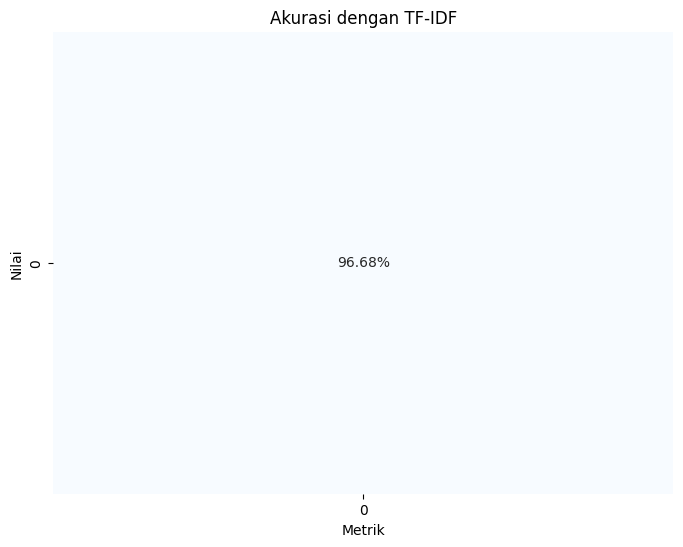

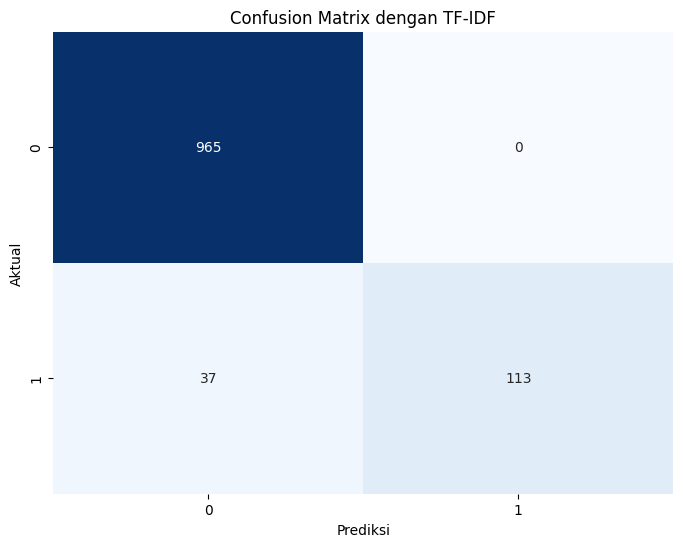

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Muat data spam.csv
data = pd.read_csv('spam.csv', encoding='latin-1')

# Bagi data menjadi data latih dan data uji
X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan konfigurasi TfidfVectorizer dengan stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Transformasi teks menjadi vektor fitur TF-IDF
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Inisialisasi model klasifikasi Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Latih model
nb_classifier.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = nb_classifier.predict(X_test)

# Evaluasi hasilnya
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi dengan TF-IDF:", accuracy)

# Laporan Klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi dengan TF-IDF:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix dengan TF-IDF:\n", conf_matrix)

# Visualisasi Akurasi
plt.figure(figsize=(8, 6))
sns.heatmap([[accuracy]], annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Akurasi dengan TF-IDF')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix dengan TF-IDF')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()